In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv("C:\\Users\\sumit\\Desktop\\LLM\Machine Learning\\Project1\\rolling_stones_spotify\\rolling_stones_spotify.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sumit\AppData\Local\Temp\ipykernel_18708\2186257029.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\\Users\\sumit\\Desktop\\LLM\Machine Learning\\Project1\\rolling_stones_spotify\\rolling_stones_spotify.csv")


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [36]:
df.shape

(1610, 18)

In [37]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [39]:
# Check for duplicates
df = df.drop_duplicates()

In [40]:
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [41]:
# Remove rows with missing values (or impute, if necessary)
df.dropna(inplace=True)

In [42]:
# Remove irrelevant columns (e.g., URI, track_href, analysis_url if present)
drop_cols = ['id', 'uri', 'track_href', 'analysis_url', 'type']  # keep 'name', 'album' for later
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

In [43]:
numeric_cols = df.select_dtypes(include='number').columns

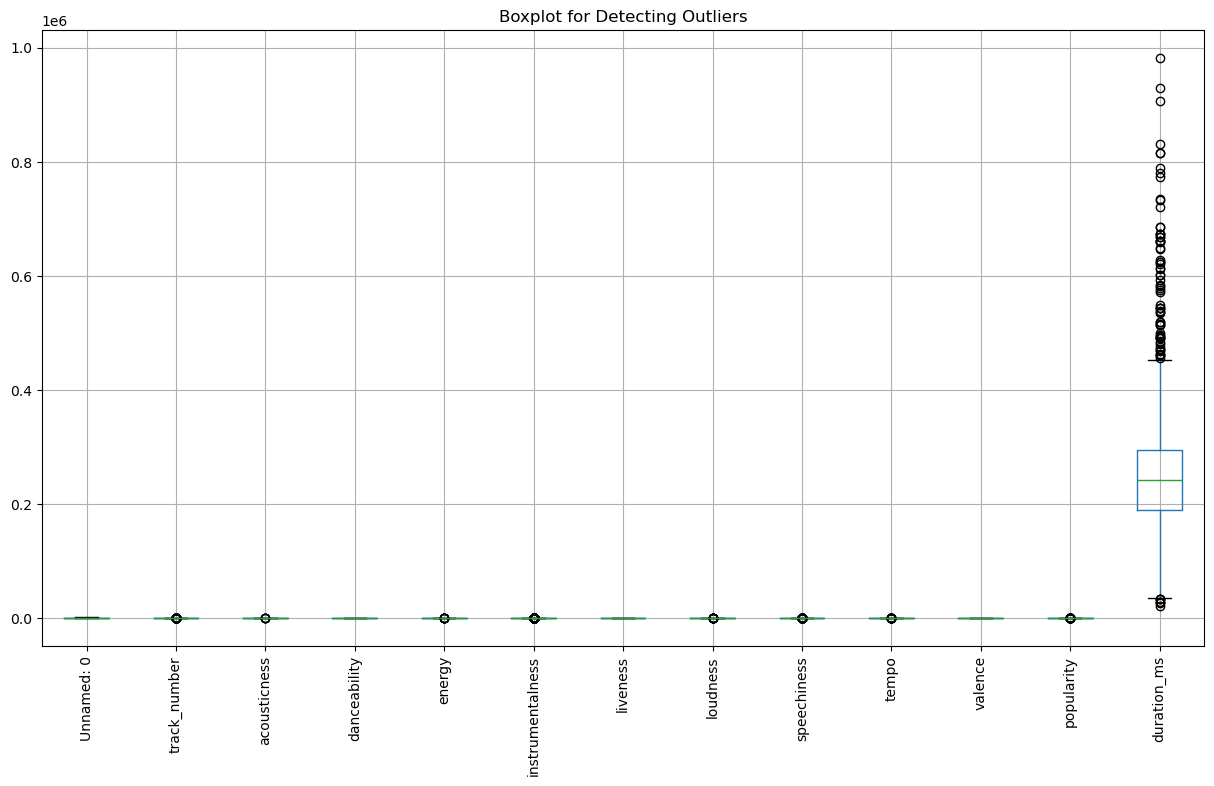

In [44]:
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot for Detecting Outliers")
plt.show()

In [45]:
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

In [46]:
# Ensure only valid numeric columns are passed
features = [col for col in audio_features if col in df.columns]
print(features)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [47]:
scaler = MinMaxScaler()

In [48]:
scaled_value = scaler.fit_transform(df[features])


In [49]:
df_scaled = pd.DataFrame(scaled_value, columns=features)

In [ ]:
# To identify the top 2 albums, we define a "popular song" as one with a popularity score above 60. We then count the number of such 
# songs in each album and visualize the top performers.

In [50]:
# 3.a. Identify 2 albums with the most popular songs
# Define popularity threshold
threshold = 60

In [51]:
popular_songs = df[df['popularity'] >= threshold]
top_albums = popular_songs['album'].value_counts().head()

C:\Users\sumit\AppData\Local\Temp\ipykernel_18708\2459991878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.values, y=top_albums.index, palette='mako')


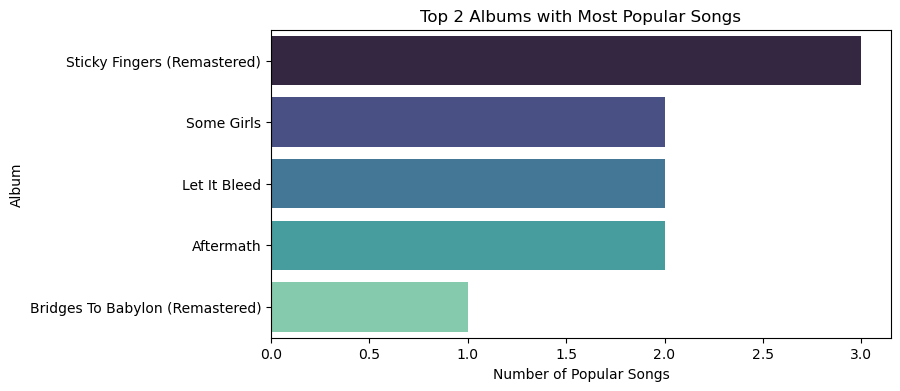

In [52]:
# Visualize
plt.figure(figsize=(8, 4))
sns.barplot(x=top_albums.values, y=top_albums.index, palette='mako')
plt.title("Top 2 Albums with Most Popular Songs")
plt.xlabel("Number of Popular Songs")
plt.ylabel("Album")
plt.show()

In [ ]:
# We explore the distribution of key audio features such as `danceability`, `energy`, `valence`, and more. This helps us understand the typical 
# sound profile of the songs. A correlation matrix is also plotted to reveal relationships between features.

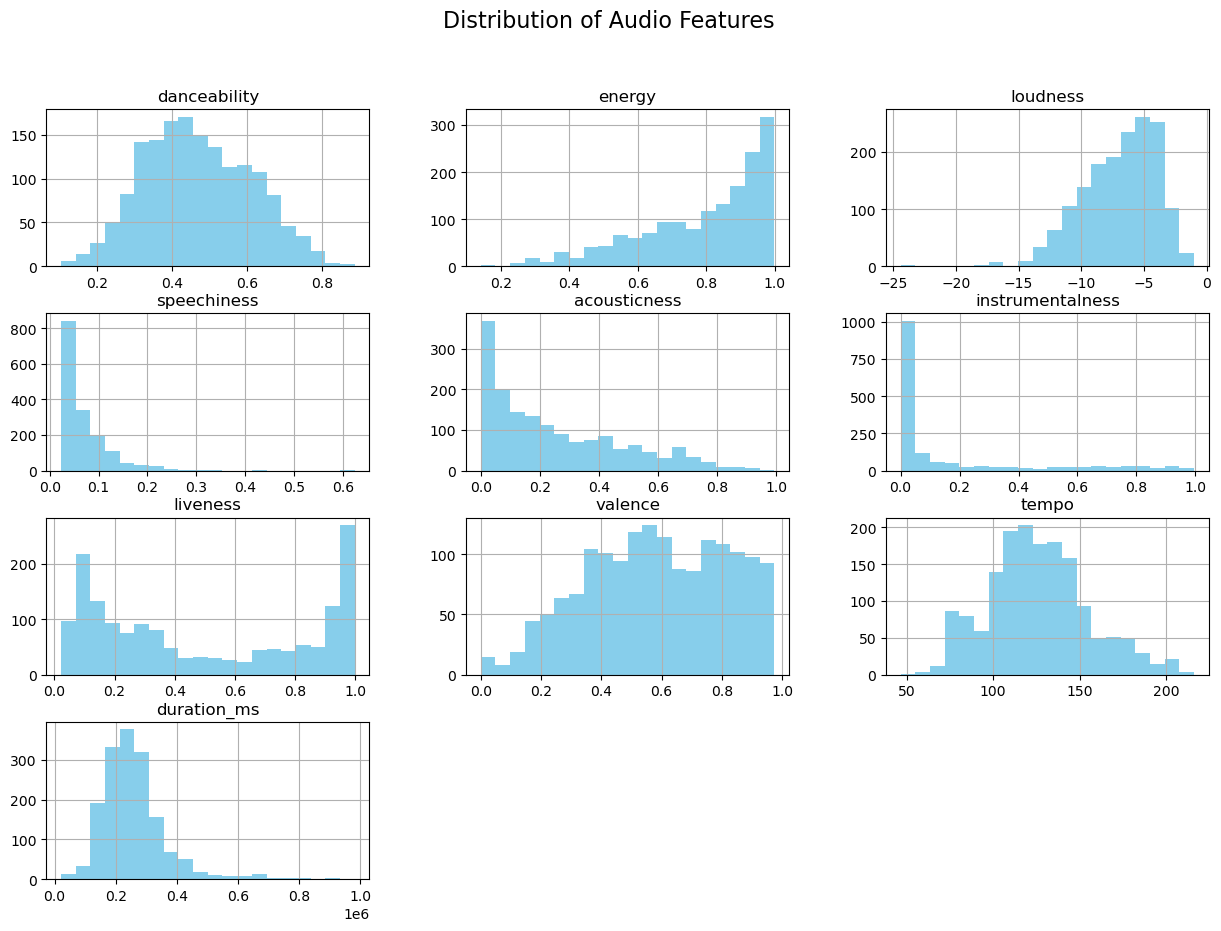

In [53]:
# 3.b. Analyze audio feature distributions
# Histograms
df[features].hist(figsize=(15, 10), bins=20, color='skyblue')
plt.suptitle("Distribution of Audio Features", fontsize=16)
plt.show()

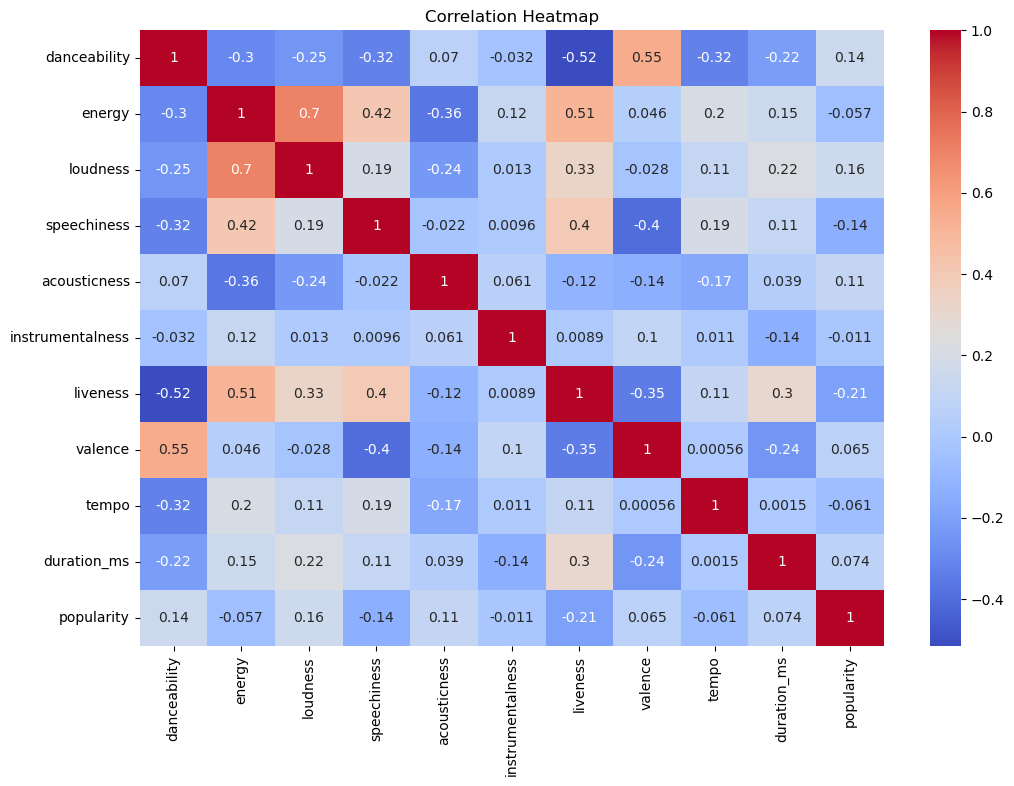

In [54]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[features + ['popularity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# We investigate how different audio characteristics impact a song's popularity. This involves scatter plots between popularity and variables 
# like `danceability`, `energy`, `tempo`, and `acousticness`.

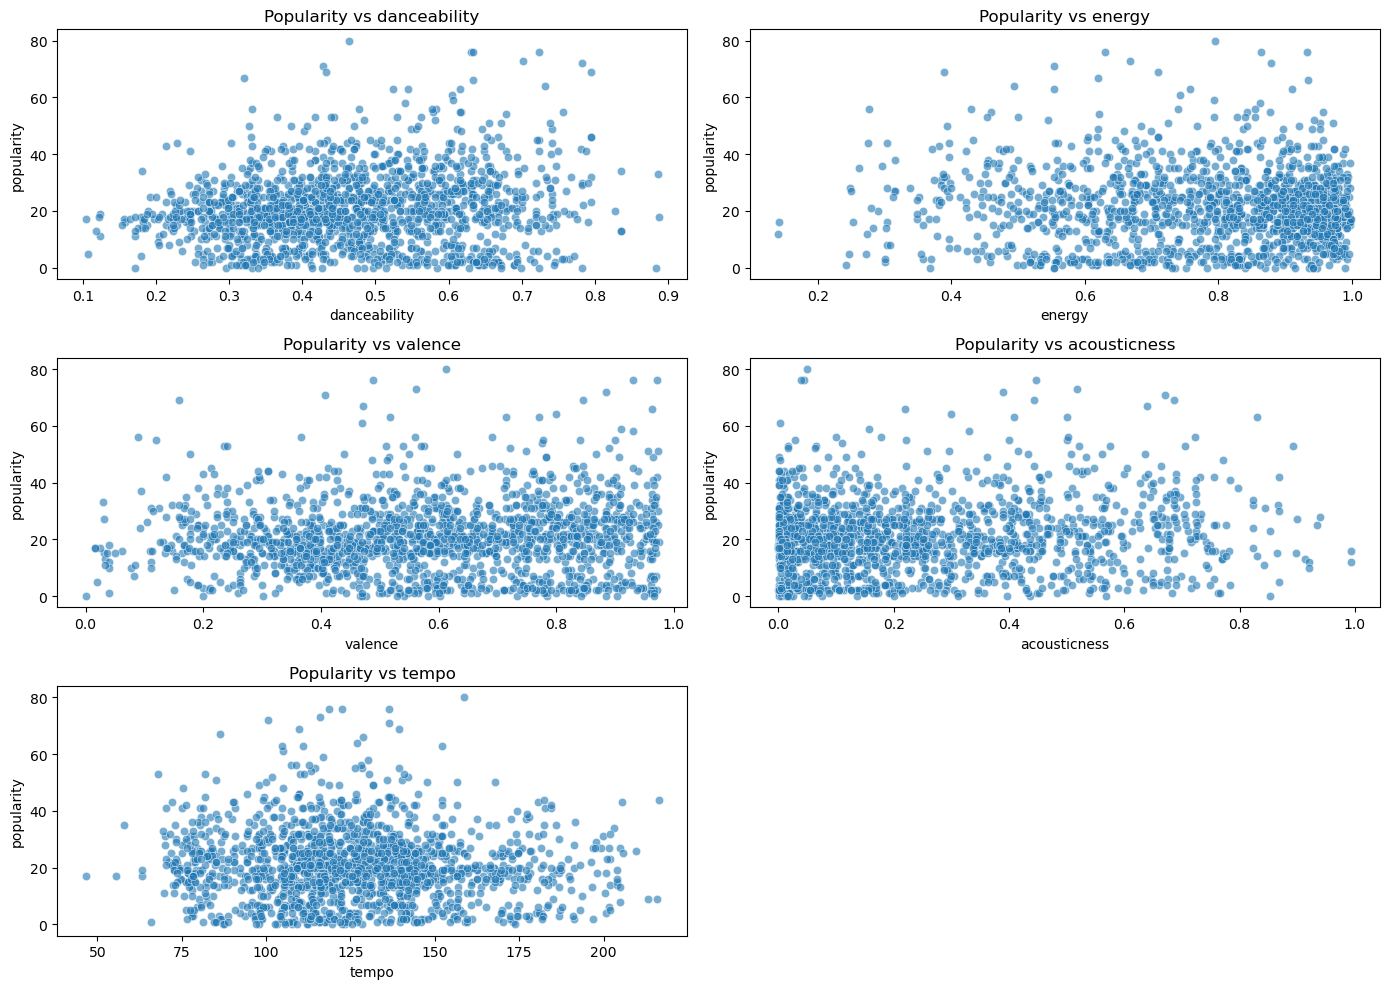

In [55]:
# 3.c. Explore relationships between popularity and features
selected = ['danceability', 'energy', 'valence', 'acousticness', 'tempo']

plt.figure(figsize=(14, 10))
for i, col in enumerate(selected):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['popularity'], alpha=0.6)
    plt.title(f'Popularity vs {col}')
plt.tight_layout()
plt.show()

In [ ]:
# We use PCA (Principal Component Analysis) to reduce the number of audio features while retaining maximum variance. 
# This helps in visualizing high-dimensional data in 2D, especially before clustering. The explained variance tells us how much information is preserved.

Explained Variance: [0.30326096 0.16514826]


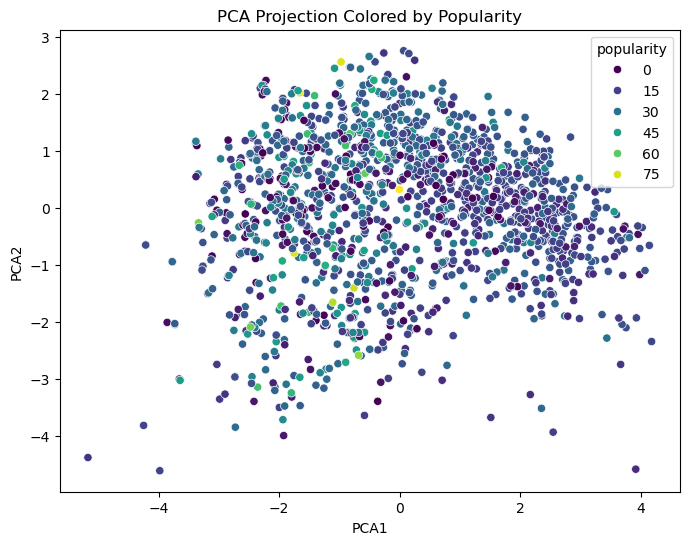

In [56]:
# 3.d. Dimensionality Reduction (PCA)
# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Explained variance
print("Explained Variance:", pca.explained_variance_ratio_)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='popularity', palette='viridis')
plt.title("PCA Projection Colored by Popularity")
plt.show()


In [57]:
# 4.a. Determine optimal number of clusters
# Determine optimal number of clusters
# We apply both the Elbow Method and Silhouette Score to determine the optimal number of clusters (`k`). These metrics help us balance model
# accuracy and simplicity

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

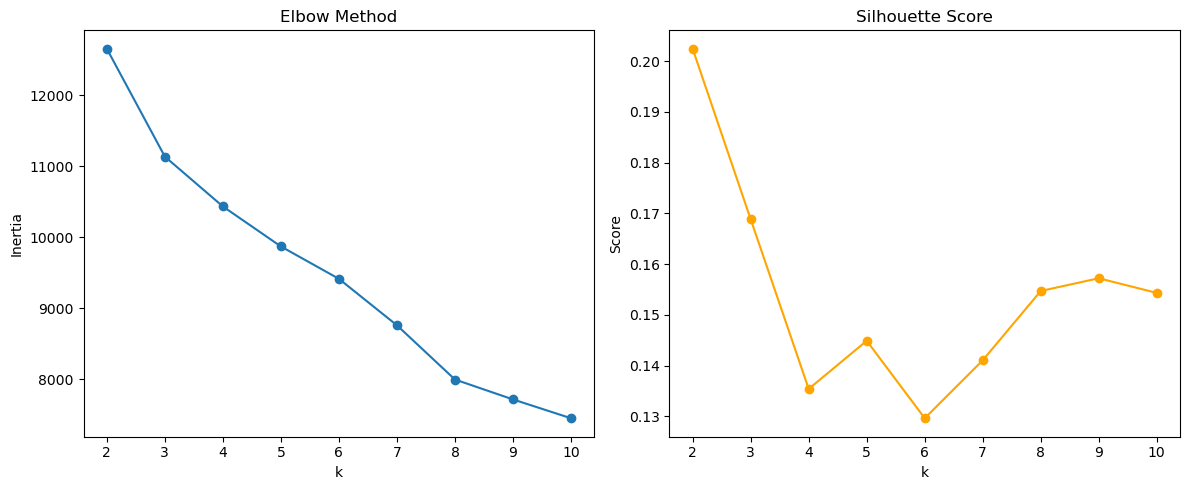

In [59]:
inertias = []
silhouette_scores = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled)
    inertias.append(model.inertia_)
    silhouette_scores.append(silhouette_score(scaled, model.labels_))

# Plot elbow and silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

In [ ]:
# We use the KMeans algorithm to group songs into clusters based on their audio features. These clusters represent different cohorts of similar songs.

In [60]:
# KMeans Clustering
# Choose optimal k based on elbow/silhouette (say k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

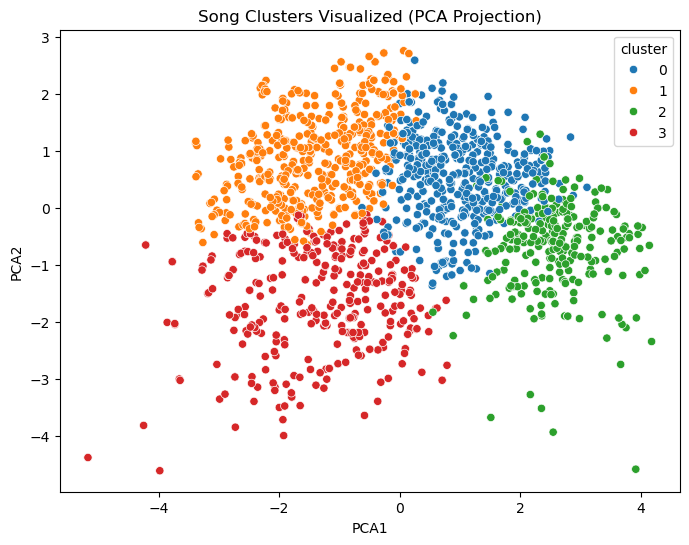

In [61]:
# Define and visualize clusters
# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title("Song Clusters Visualized (PCA Projection)")
plt.show()

In [ ]:
# We analyze each cluster to understand its characteristics. The clusters are visualized using PCA components and described based on average 
# feature values.

In [62]:
cluster_profile = df.groupby('cluster')[features + ['popularity']].mean().round(2)
print(cluster_profile)

         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0                0.41    0.90     -5.48         0.07          0.15   
1                0.60    0.77     -7.60         0.05          0.21   
2                0.33    0.94     -5.25         0.15          0.22   
3                0.47    0.56     -9.49         0.05          0.47   

         instrumentalness  liveness  valence   tempo  duration_ms  popularity  
cluster                                                                        
0                    0.15      0.71     0.60  134.03    251928.94       19.16  
1                    0.22      0.22     0.80  121.99    215257.09       22.61  
2                    0.17      0.88     0.33  136.46    356045.34       18.08  
3                    0.09      0.30     0.42  112.86    254597.62       22.42  
